In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, scale
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
#unpickle
df = pd.read_pickle("./cleaned_df.pkl")

In [3]:
df.head()

,iid,id,wave,gender,from,age,dec_o,race,imprace,imprelig,...,shopping,yoga,exphappy,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,match_es,popular
0,1,1.0,1,0,Chicago,21.0,5,4.0,2.0,4.0,...,8.0,1.0,3.0,6.0,8.0,8.0,8.0,7.0,4.0,1
1,2,2.0,1,0,Alabama,24.0,6,2.0,2.0,5.0,...,3.0,1.0,4.0,7.0,5.0,10.0,8.0,3.0,3.0,1
2,3,3.0,1,0,Connecticut,25.0,5,2.0,8.0,4.0,...,8.0,7.0,4.0,8.0,9.0,8.0,9.0,8.0,2.0,1
3,4,4.0,1,0,Texas,23.0,6,2.0,1.0,1.0,...,1.0,8.0,1.0,7.0,8.0,9.0,7.0,8.0,2.0,1
4,5,5.0,1,0,Bowdoin College,21.0,3,2.0,8.0,1.0,...,8.0,3.0,7.0,6.0,3.0,6.0,10.0,8.0,2.0,0


In [6]:
df.popular = df.popular.astype(int)

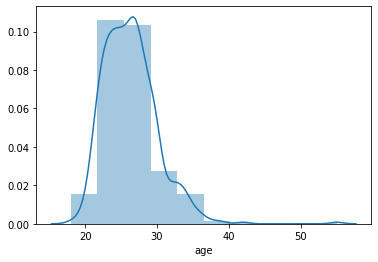

In [7]:
sns.distplot(df.age, bins=10);

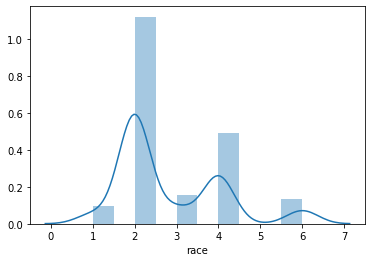

In [8]:
sns.distplot(df.race, bins=10);
#Black/African American=1
#European/Caucasian-American=2
#Latino/Hispanic American=3
#Asian/Pacific Islander/Asian-American=4
#Native American=5
#Other=6


0    0.588235
1    0.411765
Name: gender, dtype: float64


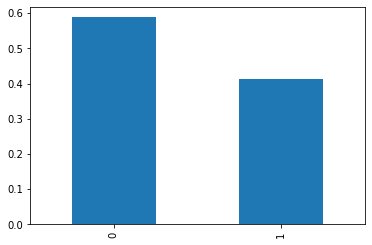

In [9]:
#gender distribution 
df_pop = df[df['popular']==1]
target = df_pop.gender.value_counts(normalize=True) 
print(target)

target.plot(kind='bar')

0    0.564103
1    0.435897
Name: popular, dtype: float64


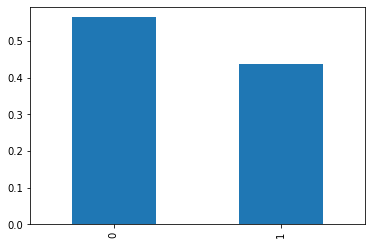

In [10]:
#checking for class imbalance
target = df.popular.value_counts(normalize=True) 
print(target)

target.plot(kind='bar')

In [11]:
df1 = df.drop(['from', 'id', 'iid', 'wave', 'dec_o'],axis=1)
df1.head()

,gender,age,race,imprace,imprelig,goal,date,go_out,career_c,sports,...,shopping,yoga,exphappy,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,match_es,popular
0,0,21.0,4.0,2.0,4.0,2.0,7.0,1.0,2.0,9.0,...,8.0,1.0,3.0,6.0,8.0,8.0,8.0,7.0,4.0,1
1,0,24.0,2.0,2.0,5.0,1.0,5.0,1.0,2.0,3.0,...,3.0,1.0,4.0,7.0,5.0,10.0,8.0,3.0,3.0,1
2,0,25.0,2.0,8.0,4.0,6.0,3.0,1.0,2.0,3.0,...,8.0,7.0,4.0,8.0,9.0,8.0,9.0,8.0,2.0,1
3,0,23.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,...,1.0,8.0,1.0,7.0,8.0,9.0,7.0,8.0,2.0,1
4,0,21.0,2.0,8.0,1.0,2.0,4.0,1.0,1.0,7.0,...,8.0,3.0,7.0,6.0,3.0,6.0,10.0,8.0,2.0,0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 550
Data columns (total 34 columns):
gender      546 non-null int64
age         546 non-null float64
race        546 non-null float64
imprace     546 non-null float64
imprelig    546 non-null float64
goal        546 non-null float64
date        546 non-null float64
go_out      546 non-null float64
career_c    546 non-null float64
sports      546 non-null float64
tvsports    546 non-null float64
exercise    546 non-null float64
dining      546 non-null float64
museums     546 non-null float64
art         546 non-null float64
hiking      546 non-null float64
gaming      546 non-null float64
clubbing    546 non-null float64
reading     546 non-null float64
tv          546 non-null float64
theater     546 non-null float64
movies      546 non-null float64
concerts    546 non-null float64
music       546 non-null float64
shopping    546 non-null float64
yoga        546 non-null float64
exphappy    546 non-null float64
attr3_

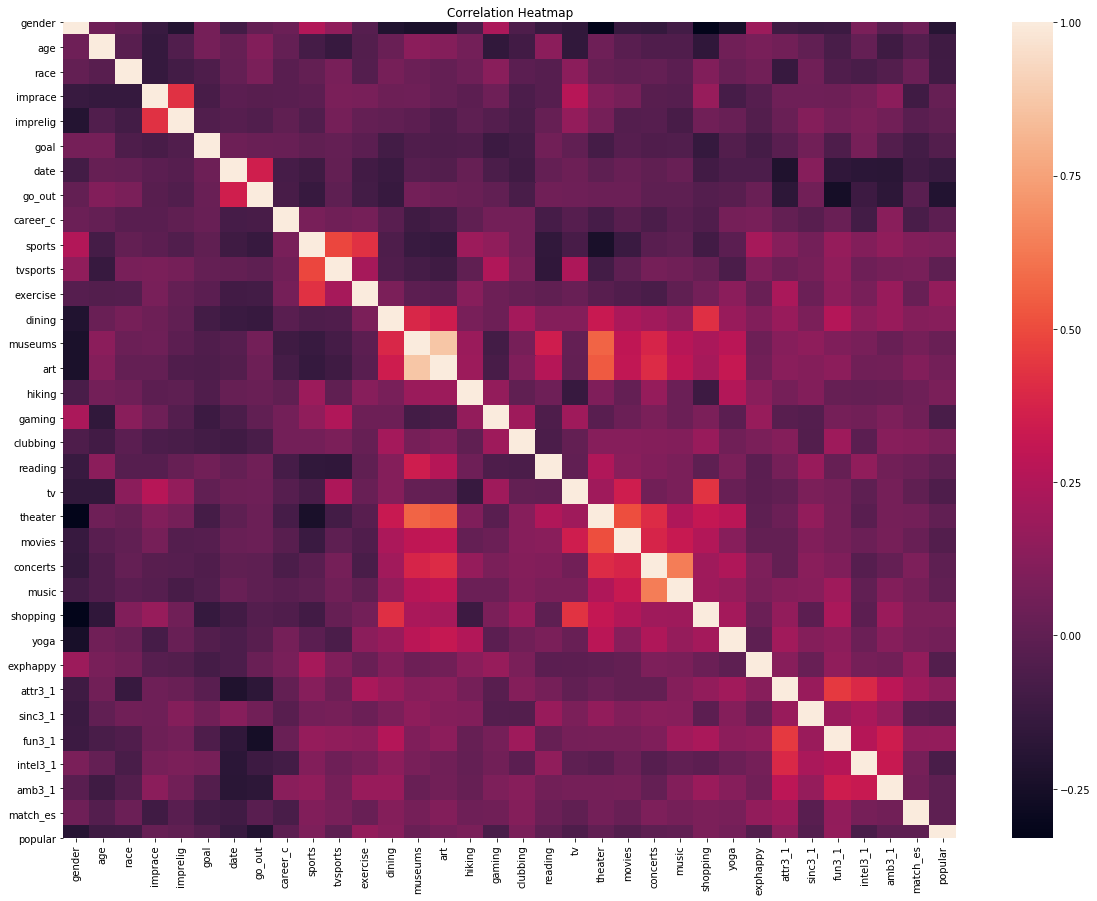

In [13]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [14]:
df1['music'].corr(df1['concerts'])

0.6404045123550166

In [15]:
df1['museums'].corr(df1['theater'])

0.5669259538278276

In [16]:
df1['concerts'].corr(df1['popular'])

-0.006702559003289818

In [ ]:
sns.set(style="ticks", color_codes=True)
df2 = pd.concat([df1.iloc[:, 0:9],df1.iloc[:, 33]],axis = 1)
sns.pairplot(df2,hue='popular')

In [ ]:
#interests vs popularity 
sns.set(style="ticks", color_codes=True)
df2 = pd.concat([df1.iloc[:, 10:26],df1.iloc[:, 33]],axis = 1)
sns.pairplot(df2,hue='popular')

In [ ]:
#attributes vs popularity
sns.set(style="ticks", color_codes=True)
df2 = pd.concat([df1.iloc[:, 27:32], df1.iloc[:, 33]], axis = 1)
sns.pairplot(df2,hue='popular')